In [3]:
import pandas as pd
import numpy as np
import pydataset
import evaluate as ev
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
preds = ev.lin_reg(tips, 'total_bill', 'tip')
preds

,total_bill,tip,yhat,yhat_baseline,residuals,residual^2,residual_baseline,residual_baseline^2
1,16.99,1.01,2.704636,2.998279,1.694636,2.871792,1.988279,1.988279
2,10.34,1.66,2.006223,2.998279,0.346223,0.119870,1.338279,1.338279
3,21.01,3.50,3.126835,2.998279,-0.373165,0.139252,-0.501721,-0.501721
4,23.68,3.31,3.407250,2.998279,0.097250,0.009458,-0.311721,-0.311721
5,24.59,3.61,3.502822,2.998279,-0.107178,0.011487,-0.611721,-0.611721
...,...,...,...,...,...,...,...,...
240,29.03,5.92,3.969131,2.998279,-1.950869,3.805888,-2.921721,-2.921721
241,27.18,2.00,3.774836,2.998279,1.774836,3.150043,0.998279,0.998279
242,22.67,2.00,3.301175,2.998279,1.301175,1.693057,0.998279,0.998279
243,17.82,1.75,2.791807,2.998279,1.041807,1.085361,1.248279,1.248279


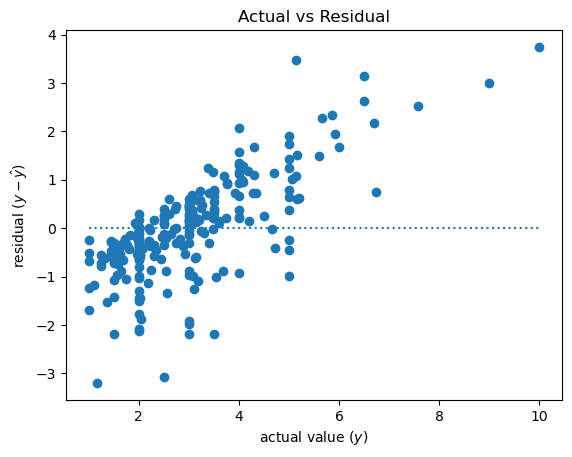

In [5]:
ev.plot_residuals(preds.tip, preds.yhat)

In [6]:
x = preds.total_bill
y = preds.tip
df_eval, df_sig = ev.get_metrics(preds, 'total_bill', 'tip')

In [7]:
df_eval

,metric,model_error,error_delta,baseline_error
0,SSE,252.788744,-212.423733,NaN
1,MSE,1.036019,-0.870589,NaN
2,RMSE,1.017850,-0.362950,NaN
0,SSE_baseline,NaN,NaN,465.212477
1,MSE_baseline,NaN,NaN,1.906609
2,RMSE_baseline,NaN,NaN,1.380800


In [8]:
df_sig

,metric,model_significance,baseline_significance
0,ESS,212.423733,NaN
1,TSS,465.212477,NaN
2,R^2,0.456617,NaN
0,ESS_baseline,NaN,0.000000
1,TSS_baseline,NaN,465.212477
2,R^2_baseline,NaN,0.000000
